In [2]:
import pandas as pd
import seaborn as sn
import matplotlib.pyplot as plt
import numpy as np
from DataCleaning import open_and_manage

In [3]:
df=open_and_manage('../quick_clean.csv')
df

,id,type,subtype,price,zip_code,cuisine_type,constructionYear,condition,heatingType,room_number,...,subtype_mansion,subtype_mixed use building,subtype_other property,subtype_penthouse,subtype_service flat,subtype_town house,subtype_triplex,subtype_villa,type_apartment,type_house
0,9042129,apartment,apartment group,473000.0,1000,No infos,2017.0,NaN,NaN,NaN,...,0,0,0,0,0,0,0,0,1,0
1,9041098,apartment,apartment group,292500.0,6001,No infos,2017.0,NaN,NaN,NaN,...,0,0,0,0,0,0,0,0,1,0
2,9039019,apartment,apartment,1550000.0,1050,usa hyper equipped,2017.0,as new,gas,3.0,...,0,0,0,0,0,0,0,0,1,0
3,9043036,apartment,apartment,195000.0,9600,installed,2014.0,good,gas,2.0,...,0,0,0,0,0,0,0,0,1,0
4,9042073,apartment,apartment,320000.0,1070,usa hyper equipped,2017.0,as new,gas,3.0,...,0,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19850,8128634,house,house,435200.0,2550,hyper equipped,2019.0,as new,gas,3.0,...,0,0,0,0,0,0,0,0,0,1
19851,8907618,house,house,420000.0,5640,No infos,NaN,as new,fueloil,0.0,...,0,0,0,0,0,0,0,0,0,1
19852,8954484,house,mansion,450000.0,2018,No infos,NaN,as new,fueloil,6.0,...,1,0,0,0,0,0,0,0,0,1
19853,9001418,house,apartment block,450000.0,9500,installed,NaN,to be done up,gas,5.0,...,0,0,0,0,0,0,0,0,0,1


In [7]:
df.columns


Index(['id', 'type', 'subtype', 'price', 'zip_code', 'cuisine_type',
       'constructionYear', 'condition', 'heatingType', 'room_number',
       'atticExists', 'basementExists', 'hasSwimmingPool',
       'nbr_parking_indoor', 'nbr_parking_outdoor', 'company_name',
       'square_metres', 'city', 'region', 'price_by_m2', 'region_Bruxelles',
       'region_Flanders', 'region_Wallonia', 'heating_carbon',
       'heating_electric', 'heating_fueloil', 'heating_gas', 'heating_pellet',
       'heating_solar', 'heating_wood', 'condition_as new', 'condition_good',
       'condition_just renovated', 'condition_to be done up',
       'condition_to renovate', 'condition_to restore', 'cuisine_No infos',
       'cuisine_hyper equipped', 'cuisine_installed', 'cuisine_not installed',
       'cuisine_semi equipped', 'cuisine_usa hyper equipped',
       'cuisine_usa installed', 'cuisine_usa semi equipped',
       'cuisine_usa uninstalled', 'subtype_apartment',
       'subtype_apartment block', 'subtype

the price variable is the target

How many rows and columns ?

In [8]:
df.shape

(19855, 72)

In [9]:
#df.columns

slect a matrix of quantitative data called df1

In [4]:
df1=df[['price','constructionYear','room_number','nbr_parking_indoor','nbr_parking_outdoor','square_metres']]
df1

,price,constructionYear,room_number,nbr_parking_indoor,nbr_parking_outdoor,square_metres
0,473000.0,2017.0,NaN,1.0,1.0,94
1,292500.0,2017.0,NaN,NaN,NaN,64
2,1550000.0,2017.0,3.0,NaN,1.0,213
3,195000.0,2014.0,2.0,NaN,NaN,75
4,320000.0,2017.0,3.0,1.0,1.0,130
...,...,...,...,...,...,...
19850,435200.0,2019.0,3.0,NaN,NaN,140
19851,420000.0,NaN,0.0,NaN,NaN,1000
19852,450000.0,NaN,6.0,NaN,NaN,253
19853,450000.0,NaN,5.0,1.0,NaN,5


correlation between the variables and the target 

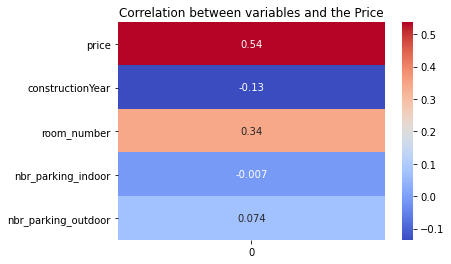

In [6]:
data1=df1.drop("square_metres", axis=1).apply(lambda x: x.corr(df1.square_metres))
corrMatrix1=pd.DataFrame(data1)
ax=plt.axes()
sn.heatmap(corrMatrix1, annot=True,cmap = 'coolwarm')
ax.set_title('Correlation between variables and the Price')
plt.show()

correlation between the variables and the other variables 

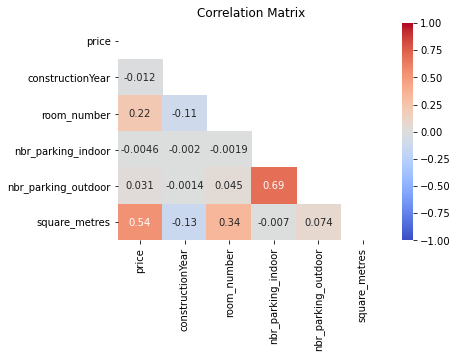

In [18]:
corrMatrix2 = df1.corr()
mask = np.zeros(corrMatrix2.shape, dtype=bool)
mask[np.triu_indices(len(mask))] = True
ax=plt.axes()
sn.heatmap(corrMatrix2, ax=ax, vmin = -1, vmax = 1, center = 0, cmap = 'coolwarm', annot = True, mask = mask)
ax.set_title('Correlation Matrix')
plt.show()


variables with the greatest influence on the target 

In [30]:
#corrMatrix1.loc[corrMatrix1.idxmax()]
corrMatrix1.nlargest(3, 0)

,0
square_metres,0.536121
room_number,0.222729
nbr_parking_outdoor,0.030961


variables with the least influence on the target

In [31]:
corrMatrix1.nsmallest(3, 0)

,0
constructionYear,-0.011539
nbr_parking_indoor,-0.004593
nbr_parking_outdoor,0.030961


In [ ]:
Percentage of missing values per column 

In [32]:
miss_val = df.isna() #transform in bool
#miss_val.head()    
#miss_val.dtypes 
miss_val_num = miss_val.sum()   #from bool to numerical
#miss_val_num
#len(df)          #>>>nbre of indexes
miss_val_num / len(df)



id                     0.000000
type                   0.000000
subtype                0.000000
price                  0.000353
zip_code               0.000000
cuisine_type           0.000000
constructionYear       0.000201
condition              0.000101
heatingType            0.000101
room_number            0.000101
atticExists            0.000000
basementExists         0.000000
hasSwimmingPool        0.000000
nbr_parking_indoor     0.645379
nbr_parking_outdoor    0.722085
company_name           0.000000
square_metres          0.000000
city                   0.000000
region                 0.000000
price_by_m2            0.000353
dtype: float64